In [1]:
#安裝python套件
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
#設置欄位名稱並讀取資料集之csv檔
df1=pd.read_csv('accelerometer.csv')
df2=pd.read_csv('accelerometer.csv')

In [3]:
df1

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172


In [4]:
#查看資料型態
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [5]:
#資料型態轉換
le=LabelEncoder()
for col in df1[["wconfid","pctid","x","y","z"]]:
    df1[col]=le.fit_transform(df1[col]).astype(np.float64)
#資料型態轉換
le=LabelEncoder()
for col in df2[["wconfid","pctid","x","y","z"]]:
    df2[col]=le.fit_transform(df2[col]).astype(np.float64)

In [6]:
#設定答案
y1= df1.pop('wconfid')
y2= df2.pop('pctid')

In [7]:
# 標準化
mean = df1.mean(axis=0)
df1 -= mean
std = df1.std(axis=0)
df1 /= std

mean = df2.mean(axis=0)
df2 -= mean
std = df2.std(axis=0)
df2 /= std

In [8]:
df1=np.array(df1)
df2=np.array(df2)
y1=np.array(y1)
y2=np.array(y2)
df2

array([[-1.22474087,  0.01028864,  0.11697373, -0.01403047],
       [-1.22474087,  0.01028864, -0.073111  , -0.01403047],
       [-1.22474087, -0.03684195,  0.11697373, -0.00638057],
       ...,
       [ 1.22474087,  0.21452119, -0.14579045, -0.21292799],
       [ 1.22474087, -0.08397254,  0.27910482, -0.10582933],
       [ 1.22474087,  0.27212524, -0.26319573,  0.44496378]])

In [9]:
#分配訓練資料、測試資料、驗證資料
X1_train, X1_test, y1_train, y1_test = train_test_split(df1, y1, test_size=0.15, random_state=1)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.176465, random_state=1) # 0.176465 x 0.85 = 0.15
X2_train, X2_test, y2_train, y2_test = train_test_split(df2, y2, test_size=0.15, random_state=1)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.176465, random_state=1) # 0.176465 x 0.85 = 0.15

# Print the shapes of the resulting datasets
print("Training data shape:", X1_train.shape)
print("Validation data shape:", X1_val.shape)
print("Test data shape:", X1_test.shape)

# Print the shapes of the resulting datasets
print("Training data shape:", X2_train.shape)
print("Validation data shape:", X2_val.shape)
print("Test data shape:", X2_test.shape)

Training data shape: (107100, 4)
Validation data shape: (22950, 4)
Test data shape: (22950, 4)
Training data shape: (107100, 4)
Validation data shape: (22950, 4)
Test data shape: (22950, 4)


In [10]:
from keras import models
from keras import layers

def build_model1():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X1_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))
    model.summary()
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X2_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'mape'])
    return model

# Validation

In [11]:
model1 = build_model1()
h1=model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=20, batch_size=16, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6694/6694 [==============================] - 32s 5ms/step - loss: 1.1920e-07 - accuracy: 0.3333 - val_loss: 1.1854e-07 - val_accuracy: 0.3360
Epoch 2/20
6694/6694 [==============================] - 31s 5ms/step - loss: 1.1920e-07 - accuracy: 0.3333 - val_loss: 1.1854e-07 - val_accuracy: 0.3360
Epoch 3/20
4

KeyboardInterrupt: 

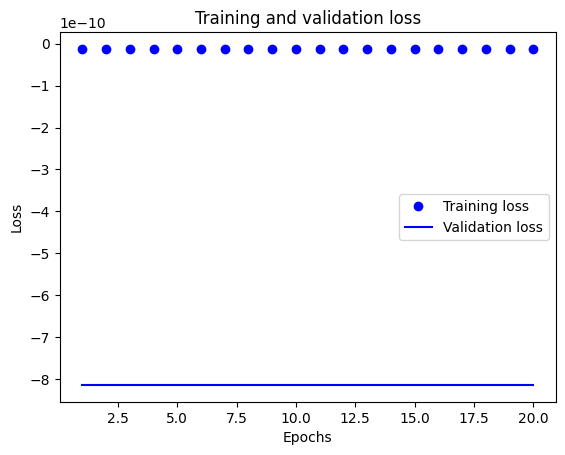

In [19]:
import matplotlib.pyplot as plt

loss = h1.history['loss']
val_loss = h1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

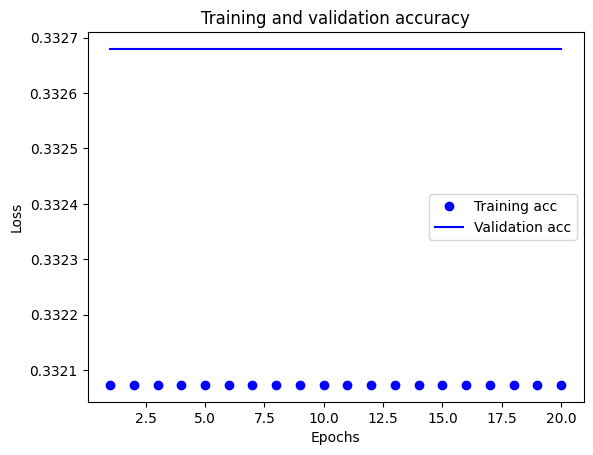

In [20]:
plt.clf()   # clear figure

acc = h1.history['accuracy']
val_acc = h1.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
# Get a fresh, compiled model.
model1 = build_model1()
# Train it on the entirety of the data.
h1=model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=50, batch_size=16, verbose=1)

# 預測結果
test1_pred = model1.predict(X1_test)

# 評估模型表現
test1_eval = model1.evaluate(X1_test, y1_test)
test1_score= model1.evaluate(X1_test, y1_test)
print('accuracy:', test1_score)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                320       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6694/6694 [==============================] - 34s 5ms/step - loss: -1.2269e-11 - accuracy: 0.3072 - val_loss: -8.1430e-10 - val_accuracy: 0.3056
Epoch 2/50
6694/6694 [==============================] - 33s 5ms/step - loss: -1.2269e-11 - accuracy: 0.3072 - val_loss: -8.1430e-10 - val_accuracy: 0.3056
Epoch 

KeyboardInterrupt: 

In [13]:
# Get a fresh, compiled model.
model2 = build_model2()
# Train it on the entirety of the data.
h=model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=50, batch_size=16, verbose=1)

# 預測結果
test2_pred = model2.predict(X2_test)

# 評估模型表現
test2_eval = model2.evaluate(X2_test, y2_test)
score= model2.evaluate(X2_test, y2_test)
print('mse:', score[0])
print('mae:', score[1])
print('mape:', score[2])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6694/6694 [==============================] - 36s 5ms/step - loss: 0.2429 - mae: 0.3711 - mse: 0.2429 - val_loss: 0.1939 - val_mae: 0.3288 - val_mse: 0.1939
Epoch 2/50
6694/6694 [==============================] - 35s 5ms/step - loss: 0.1931 - mae: 0.3285 - mse: 0.1931 - val_loss: 0.1856 - val_mae: 0.3193 

Epoch 45/50
6694/6694 [==============================] - 29s 4ms/step - loss: 0.1751 - mae: 0.3094 - mse: 0.1751 - val_loss: 0.1770 - val_mae: 0.3108 - val_mse: 0.1770
Epoch 46/50
6694/6694 [==============================] - 28s 4ms/step - loss: 0.1752 - mae: 0.3094 - mse: 0.1752 - val_loss: 0.1790 - val_mae: 0.3133 - val_mse: 0.1790
Epoch 47/50
6694/6694 [==============================] - 29s 4ms/step - loss: 0.1749 - mae: 0.3093 - mse: 0.1749 - val_loss: 0.1838 - val_mae: 0.3103 - val_mse: 0.1838
Epoch 48/50
6694/6694 [==============================] - 28s 4ms/step - loss: 0.1754 - mae: 0.3093 - mse: 0.1754 - val_loss: 0.1776 - val_mae: 0.3184 - val_mse: 0.1776
Epoch 49/50
6694/6694 [==============================] - 29s 4ms/step - loss: 0.1750 - mae: 0.3091 - mse: 0.1750 - val_loss: 0.1764 - val_mae: 0.3086 - val_mse: 0.1764
Epoch 50/50
718/718 [==============================] - 1s 2ms/step - loss: 0.1706 - mae: 0.3063 - mse: 0.1706


ValueError: too many values to unpack (expected 2)